# Explore here

In [14]:
import os
import pandas as pd
import seaborn as sns
from dotenv import load_dotenv
import spotipy
import matplotlib.pyplot as plt


# load the .env file variables
load_dotenv()

from dotenv import load_dotenv
load_dotenv()

import os

client_id = os.environ.get("CLIENT_ID")
client_secret = os.environ.get("CLIENT_SECRET")

In [6]:
sp = spotipy.Spotify(auth_manager=spotipy.oauth2.SpotifyClientCredentials(client_id=client_id, client_secret=client_secret))

In [10]:
# Código de spotify del artista
qotsa = '4pejUc4iciQfgdX6OKulQn'

# Solicito a la API con claves de acceso(sp) de los datos del artista
artist = sp.artist('4pejUc4iciQfgdX6OKulQn')

# Solicito a la API el top de canciones del artista
top_tracks_response = sp.artist_top_tracks(qotsa)

# Extraigo la información de las canciones principales
top_tracks = top_tracks_response['tracks']

# Lista para almacenar los resultados
best_songs_qotsa = []

# Sacar nombre de la canción, duración y popularidad
# Iteramos sobre las canciones principales y mostramos sus nombres

print("Top 10 de canciones del artista:")
for i, track in enumerate(top_tracks[:10], 1):  # 1. enumerate() es una función de Python que toma una secuencia (en este caso, la lista top_tracks[:10] que contiene las primeras 10 canciones principales del artista)
    nombre = track['name']                      #   y devuelve un iterador que genera pares (índice, elemento) para cada elemento en la secuencia. El segundo argumento opcional 1 especifica el valor inicial del índice, que en este caso comienza en 1 en lugar del valor predeterminado 0.
    popularidad = track['popularity']           # 2. for i, track in ...: Esto es una declaración de bucle for que itera sobre los elementos generados por enumerate().
    duracion = track['duration_ms']             #   En cada iteración, i será el índice de la canción en la lista (1, 2, 3, ..., 10) y track será la información de la canción.
    print(f"{i}. {nombre} - {popularidad} - {duracion}")

    # Añadimos la información extraída de interés a la lista (dentro del bucle!!)
    best_songs_qotsa.append({'Nombre': nombre, 'Popularidad': popularidad, 'Duración (ms)': duracion})

# Convertimos la lista en un DataFrame
data = pd.DataFrame(best_songs_qotsa)



Top 10 de canciones del artista:
1. No One Knows - 66 - 278706
2. Go With The Flow - 64 - 187120
3. Little Sister - 61 - 174026
4. Make It Wit Chu - 64 - 290493
5. I Sat by the Ocean - 63 - 235586
6. 3's & 7's - 55 - 214066
7. You Think I Ain't Worth A Dollar, But I Feel Like A Millionaire - 56 - 192573
8. Song For The Dead - 54 - 352440
9. First It Giveth - 54 - 198386
10. The Way You Used To Do - 59 - 274281


In [11]:
# Ordeno el dataframe por popularidad creciente y top 3
data_ordenado = data.sort_values(by='Popularidad')
top_3 = data_ordenado.tail(3)
top_3

,Nombre,Popularidad,Duración (ms)
1,Go With The Flow,64,187120
3,Make It Wit Chu,64,290493
0,No One Knows,66,278706


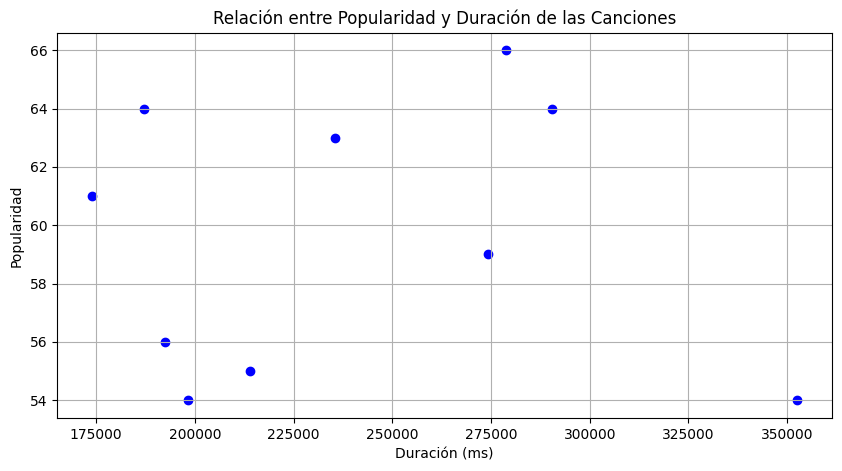

In [15]:
plt.figure(figsize=(10, 5))
plt.scatter(data['Duración (ms)'], data['Popularidad'], color='blue')
plt.title('Relación entre Popularidad y Duración de las Canciones')
plt.xlabel('Duración (ms)')
plt.ylabel('Popularidad')
plt.grid(True)
plt.show()

In [18]:
correlacion = data['Popularidad'].corr(data['Duración (ms)'])
print("Correlación entre popularidad y duración:", correlacion)

if correlacion > 0.5:
    print("Hay una correlación significativa entre la duración y la popularidad")
else:
    print("No existe correlación significativa entre la duración y la popularidad")


Correlación entre popularidad y duración: 0.0011288417482043598
No existe correlación significativa entre la duración y la popularidad
